In [2]:
import pandas as pd

# Load the dataset
data_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\full_df.csv'
data = pd.read_csv(data_path)

# Display basic information and the first few rows of the dataset
basic_info = data.info()
first_rows = data.head()

basic_info, first_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
ID                           6392 non-null int64
Patient Age                  6392 non-null int64
Patient Sex                  6392 non-null object
Left-Fundus                  6392 non-null object
Right-Fundus                 6392 non-null object
Left-Diagnostic Keywords     6392 non-null object
Right-Diagnostic Keywords    6392 non-null object
N                            6392 non-null int64
D                            6392 non-null int64
G                            6392 non-null int64
C                            6392 non-null int64
A                            6392 non-null int64
H                            6392 non-null int64
M                            6392 non-null int64
O                            6392 non-null int64
filepath                     6392 non-null object
labels                       6392 non-null object
target                       6392 non-null object
fil

(None,    ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
 0   0           69      Female  0_left.jpg  0_right.jpg   
 1   1           57        Male  1_left.jpg  1_right.jpg   
 2   2           42        Male  2_left.jpg  2_right.jpg   
 3   4           53        Male  4_left.jpg  4_right.jpg   
 4   5           50      Female  5_left.jpg  5_right.jpg   
 
                             Left-Diagnostic Keywords  \
 0                                           cataract   
 1                                      normal fundus   
 2  laser spot，moderate non proliferative retinopathy   
 3                        macular epiretinal membrane   
 4             moderate non proliferative retinopathy   
 
                 Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
 0                           normal fundus  0  0  0  1  0  0  0  0   
 1                           normal fundus  1  0  0  0  0  0  0  0   
 2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
 3      

In [3]:
import ast  # 导入ast模块，用于安全地评估字符串字面量作为表达式  
  
# 将标签转换为独热编码的函数  
def labels_to_onehot(labels_str):  
    # 将字符串表示的列表转换为实际列表  
    labels_list = ast.literal_eval(labels_str)  
      
    # 初始化一个独热编码列表，全部为0（假设有8个类别，如数据集中所见）  
    onehot = [0] * 8  
      
    # 根据观察到的数据结构，从标签到索引的映射  
    label_to_index = {'N': 0, 'D': 1, 'G': 2, 'C': 3, 'A': 4, 'H': 5, 'M': 6, 'O': 7}  
      
    # 对于标签列表中的每个标签，将相应的索引设置为1  
    for label in labels_list:  
        if label in label_to_index:  # 安全检查  
            onehot[label_to_index[label]] = 1  
              
    return onehot  
  
# 选择一些记录进行检查  
sample_data = data[['labels', 'target']].head(10)  
  
# 将'labels'转换为独热编码，并与'target'进行比较  
for index, row in sample_data.iterrows():  
    onehot_from_labels = labels_to_onehot(row['labels'])  
    target = ast.literal_eval(row['target'])  # 将字符串表示的列表转换为实际列表  
    print(f"记录 {index}:")  
    print(f"标签: {row['labels']}")  
    print(f"计算得到的独热编码: {onehot_from_labels}")  
    print(f"原始目标: {target}")  
    print(f"是否匹配: {onehot_from_labels == target}\n")

记录 0:
标签: ['N']
计算得到的独热编码: [1, 0, 0, 0, 0, 0, 0, 0]
原始目标: [1, 0, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 1:
标签: ['N']
计算得到的独热编码: [1, 0, 0, 0, 0, 0, 0, 0]
原始目标: [1, 0, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 2:
标签: ['D']
计算得到的独热编码: [0, 1, 0, 0, 0, 0, 0, 0]
原始目标: [0, 1, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 3:
标签: ['D']
计算得到的独热编码: [0, 1, 0, 0, 0, 0, 0, 0]
原始目标: [0, 1, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 4:
标签: ['D']
计算得到的独热编码: [0, 1, 0, 0, 0, 0, 0, 0]
原始目标: [0, 1, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 5:
标签: ['D']
计算得到的独热编码: [0, 1, 0, 0, 0, 0, 0, 0]
原始目标: [0, 1, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 6:
标签: ['D']
计算得到的独热编码: [0, 1, 0, 0, 0, 0, 0, 0]
原始目标: [0, 1, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 7:
标签: ['N']
计算得到的独热编码: [1, 0, 0, 0, 0, 0, 0, 0]
原始目标: [1, 0, 0, 0, 0, 0, 0, 0]
是否匹配: True

记录 8:
标签: ['O']
计算得到的独热编码: [0, 0, 0, 0, 0, 0, 0, 1]
原始目标: [0, 0, 0, 0, 0, 0, 0, 1]
是否匹配: True

记录 9:
标签: ['N']
计算得到的独热编码: [1, 0, 0, 0, 0, 0, 0, 0]
原始目标: [1, 0, 0, 0, 0, 0, 0, 0]
是否匹配: True



In [4]:
import pandas as pd
import ast 

# 加载数据集
data_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\full_df.csv'
data = pd.read_csv(data_path)

# 转换列为标签列表的函数
def columns_to_labels(row):
    # 列名到标签的映射
    column_to_label = {'N': 'N', 'D': 'D', 'G': 'G', 'C': 'C', 'A': 'A', 'H': 'H', 'M': 'M', 'O': 'O'}
    
    # 基于列值构建标签列表
    labels_list = [column_to_label[column] for column in column_to_label if row[column] == 1]
    
    return labels_list

# 选择数据集的一部分进行检查
sample_data = data.iloc[:10, 7:15]  # 选择行和特定的列 N, D, G, C, A, H, M, O

# 将 N, D, G, C, A, H, M, O 列转换为标签并与 'labels' 列比较
verification_results = []
for index, row in sample_data.iterrows():
    labels_from_columns = columns_to_labels(row)
    labels_from_labels_col = ast.literal_eval(data.at[index, 'labels'])  # 将字符串表示的列表转换为实际列表
    verification_results.append((index, labels_from_columns, labels_from_labels_col, labels_from_columns == labels_from_labels_col))

# 打印验证结果
for result in verification_results:
    print(f"记录 {result[0]}:")
    print(f"从列生成的标签: {result[1]}")
    print(f"'labels' 列的值: {result[2]}")
    print(f"匹配: {result[3]}\n")


记录 0:
从列生成的标签: ['C']
'labels' 列的值: ['N']
匹配: False

记录 1:
从列生成的标签: ['N']
'labels' 列的值: ['N']
匹配: True

记录 2:
从列生成的标签: ['D', 'O']
'labels' 列的值: ['D']
匹配: False

记录 3:
从列生成的标签: ['D', 'O']
'labels' 列的值: ['D']
匹配: False

记录 4:
从列生成的标签: ['D']
'labels' 列的值: ['D']
匹配: True

记录 5:
从列生成的标签: ['D', 'O']
'labels' 列的值: ['D']
匹配: False

记录 6:
从列生成的标签: ['D', 'O']
'labels' 列的值: ['D']
匹配: False

记录 7:
从列生成的标签: ['N']
'labels' 列的值: ['N']
匹配: True

记录 8:
从列生成的标签: ['O']
'labels' 列的值: ['O']
匹配: True

记录 9:
从列生成的标签: ['O']
'labels' 列的值: ['N']
匹配: False



In [5]:
import os
from PIL import Image

# 设置你想查看图片的文件夹路径
folder_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\preprocessed_images'

# 获取文件夹中的所有文件
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# 初始化一个计数器，用于只处理前10个JPG文件
count = 0

# 遍历所有文件
for file in files:
    # 检查文件扩展名是否为.jpg或.jpeg（不区分大小写）
    if file.lower().endswith(('.jpg', '.jpeg')) and count < 10:
        # 增加计数器
        count += 1
        
        # 获取文件的完整路径
        file_path = os.path.join(folder_path, file)
        
        # 使用Pillow打开图片
        with Image.open(file_path) as img:
            # 打印图片的相关信息
            print(f"文件名: {file}")
            print(f"图片尺寸: {img.size}")
            print(f"图片格式: {img.format}")
            print(f"图片模式: {img.mode}")
            print("-" * 20)

    # 当处理完10个文件后跳出循环
    if count >= 10:
        break

if count == 0:
    print("没有找到JPG图片")


文件名: 0_left.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 0_right.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1005_right.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1006_left.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1006_right.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1008_left.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1008_right.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 100_left.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 100_right.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------
文件名: 1010_left.jpg
图片尺寸: (512, 512)
图片格式: JPEG
图片模式: RGB
--------------------


In [1]:
import pandas as pd

# 加载数据集
df = pd.read_csv(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\full_df.csv')

# 定义一个函数来检查诊断关键词到疾病标签的关系
def check_keywords_to_labels_relationship(df):
    # 提取相关列
    keywords_columns = ['Left-Diagnostic Keywords', 'Right-Diagnostic Keywords']
    labels_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

    # 创建一个DataFrame来保存关键词和对应标签的唯一组合
    unique_combinations = df[keywords_columns + labels_columns].drop_duplicates()
    
    # 检查是否存在相同关键词组合对应多个标签组合的情况
    for index, row in unique_combinations.iterrows():
        # 筛选出具有相同关键词的行
        same_keywords = df[(df['Left-Diagnostic Keywords'] == row['Left-Diagnostic Keywords']) &
                           (df['Right-Diagnostic Keywords'] == row['Right-Diagnostic Keywords'])]
        
        # 检查是否存在多个标签组合
        unique_labels = same_keywords[labels_columns].drop_duplicates()
        if len(unique_labels) > 1:
            return False, unique_combinations

    # 如果循环完成没有返回False，说明所有关键词组合都有唯一的标签组合
    return True, unique_combinations

# 执行函数并检查结果
relationship_status, unique_combinations = check_keywords_to_labels_relationship(df)

# 打印结果
print(f"关键词与标签之间的一一对应关系: {relationship_status}")
print(f"唯一关键词和标签组合数量: {unique_combinations.shape[0]}")

关键词与标签之间的一一对应关系: True
唯一关键词和标签组合数量: 604


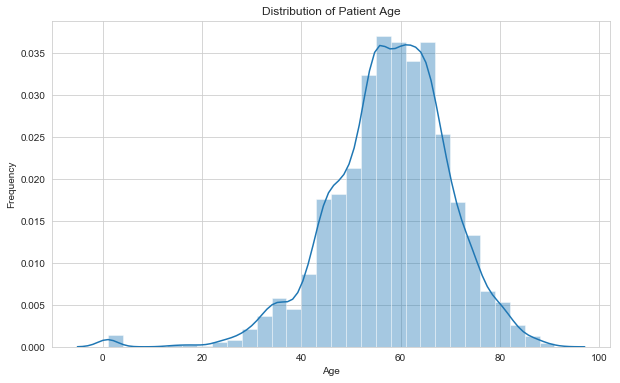

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 从CSV文件中读取数据
data = pd.read_csv(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\full_df.csv')

# 设置绘图的美学风格
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.distplot(data['Patient Age'], bins=30, kde=True)  # 绘制分布图，bins表示直方图的箱子数量，kde表示是否绘制核密度估计
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

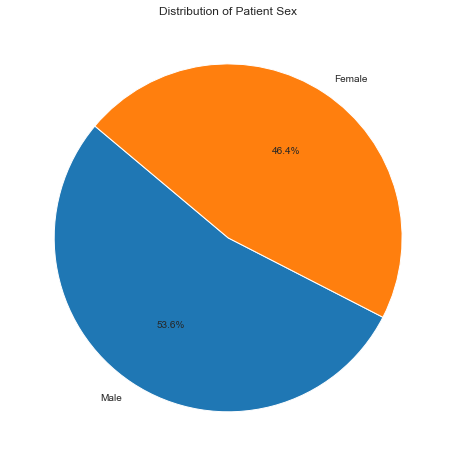

In [9]:
# 根据性别统计患者数量
gender_counts = data['Patient Sex'].value_counts()

# 使用饼图绘制性别分布  
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patient Sex')
plt.show()

In [5]:
# 检查数据集中的缺失值  
missing_values = data.isnull().sum()

# 显示每列的缺失值数量  
missing_values

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

In [11]:
import pandas as pd

# 加载数据集
df = pd.read_csv(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\full_df.csv')

# 定义映射规则
disease_mapping = {
    'normal fundus': 'N',
    'diabetic retinopathy': 'D',
    'glaucoma': 'G',
    'cataract': 'C',
    'age-related macular degeneration': 'A',
    'hypertensive retinopathy': 'H',
    'pathological myopia': 'M',
}

# 初始化标签列
for label in ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']:
    df[label + '_pred'] = 0

# 更新疾病列的函数
def update_disease_columns(row):
    keywords = str(row['Left-Diagnostic Keywords']) + '，' + str(row['Right-Diagnostic Keywords'])
    for keyword, label in disease_mapping.items():
        if keyword in keywords:
            row[label + '_pred'] = 1
    if all(row[label + '_pred'] == 0 for label in disease_mapping.values()):
        row['O_pred'] = 1
    return row

# 应用映射规则
df = df.apply(update_disease_columns, axis=1)

# 检验正确率的函数
def calculate_accuracy_for_ones_and_zeros(df, labels):
    accuracy_results = {}
    for label in labels:
        correct_predictions_for_ones = ((df[label] == df[label + '_pred']) & (df[label] == 1)).sum()
        total_ones = (df[label] == 1).sum()
        accuracy_for_ones = correct_predictions_for_ones / total_ones if total_ones else 0

        correct_predictions_for_zeros = ((df[label] == df[label + '_pred']) & (df[label] == 0)).sum()
        total_zeros = (df[label] == 0).sum()
        accuracy_for_zeros = correct_predictions_for_zeros / total_zeros if total_zeros else 0

        accuracy_results[label] = {'ones_accuracy': accuracy_for_ones, 'zeros_accuracy': accuracy_for_zeros}
    return accuracy_results

# 调用检验函数
labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
accuracy_results = calculate_accuracy_for_ones_and_zeros(df, labels)
accuracy_results

{'N': {'ones_accuracy': 1.0, 'zeros_accuracy': 0.6569564204148217},
 'D': {'ones_accuracy': 0.053697597739048517, 'zeros_accuracy': 1.0},
 'G': {'ones_accuracy': 1.0, 'zeros_accuracy': 1.0},
 'C': {'ones_accuracy': 1.0, 'zeros_accuracy': 1.0},
 'A': {'ones_accuracy': 1.0, 'zeros_accuracy': 1.0},
 'H': {'ones_accuracy': 1.0, 'zeros_accuracy': 1.0},
 'M': {'ones_accuracy': 0.9444444444444444, 'zeros_accuracy': 1.0},
 'O': {'ones_accuracy': 0.35768261964735515,
  'zeros_accuracy': 0.8059950041631974}}